In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [2]:
plt.style.use('seaborn')

C:\Users\Hammam\AppData\Local\Temp\ipykernel_20748\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Load Datasets

In [3]:
df_daibetes = pd.read_csv('./pima_diabetes.csv')
df_daibetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
print('Total Data:', df_daibetes.shape[0])
print('Total Features:', df_daibetes.shape[1])

Total Data: 767
Total Features: 9


In [8]:
df_daibetes.columns = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'predigree', 'age', 'class']
df_daibetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,predigree,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


C:\Users\Hammam\AppData\Local\Temp\ipykernel_20748\372161241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_daibetes['age'])
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

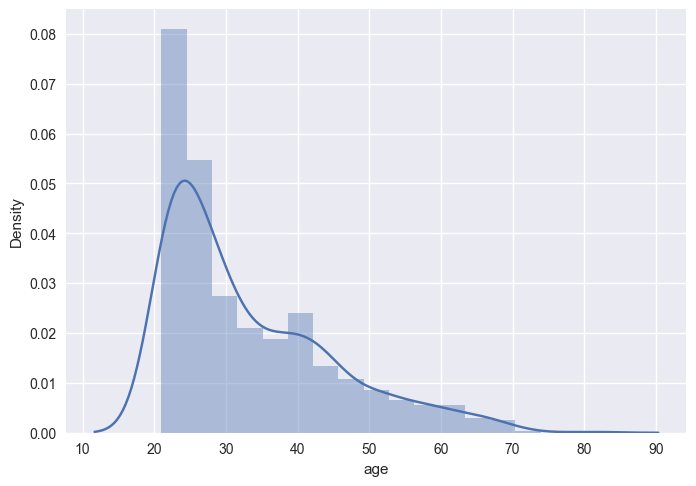

In [9]:
sns.distplot(df_daibetes['age'])

In [10]:
df_daibetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,predigree,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [11]:
features = df_daibetes.values[:, :8]

In [12]:
lables = df_daibetes.values[:, 8:]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=20)

## Define Model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(12, input_dim=8, activation='relu')) # 1 hidden layer
model.add(Dense(8, activation='relu')) # 2 hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model

In [20]:
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 3s 3ms/step - loss: 2.1196 - accuracy: 0.5824
Epoch 2/250
77/77 [==============================] - 0s 3ms/step - loss: 1.0120 - accuracy: 0.5954
Epoch 3/250
77/77 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.6558
Epoch 4/250
77/77 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.6281
Epoch 5/250
77/77 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.6558
Epoch 6/250
77/77 [==============================] - 0s 5ms/step - loss: 0.7056 - accuracy: 0.6591
Epoch 7/250
77/77 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.6607
Epoch 8/250
77/77 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.6574
Epoch 9/250
77/77 [==============================] - 0s 6ms/step - loss: 0.6482 - accuracy: 0.6917
Epoch 10/250
77/77 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6819
Epoch 11/

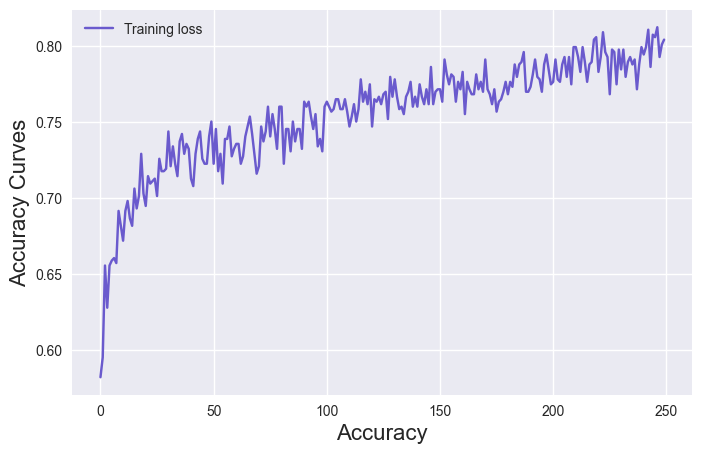

In [22]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], c='slateblue')
plt.legend(['Training loss'])
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Accuracy Curves', fontsize=16)

plt.show()

# Evaluate Model

In [23]:
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 75.32
